Text(0.5, 1.0, 'Original Image')

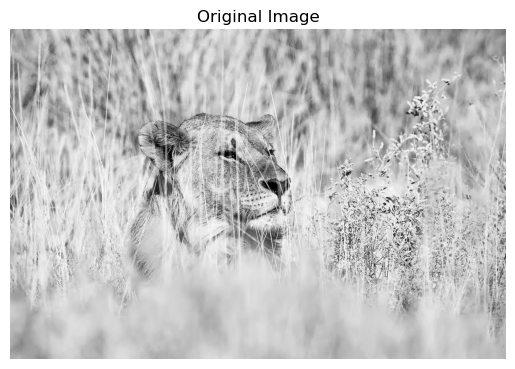

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, sys

image = cv2.imread('Pic6.jpg')
gray_img = (0.1140*image[:,:,0] + 0.5870*image[:,:,1]+ 0.2989*image[:,:,2]).astype(np.uint8)
w, h = gray_img.shape
plt.axis("off")
plt.imshow(gray_img, 'gray')
plt.title('Original Image')

Text(0, 0.5, 'Frequency')

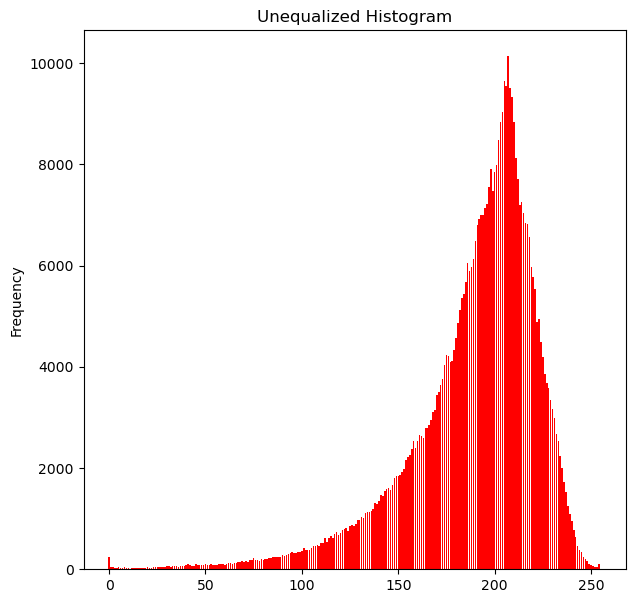

In [78]:
hist_f = np.zeros(256) # Creat 1D array of zeros
for i in range(w):
    for j in range(h):
        hist_f[(gray_img[i,j])] = hist_f[(gray_img[i,j])] + 1  
plt.figure(figsize=(7, 7))
plt.bar(list(range(len(hist_f))), hist_f, color='red') 
plt.title('Unequalized Histogram')
plt.ylabel('Frequency')

In [79]:
r_k = np.unique(gray_img)
p_k = hist_f
prob_m = p_k / np.sum(p_k)
C_m = np.zeros(len(p_k))
for i in range(len(p_k)):
    C_m[i] = prob_m[i] + C_m[i-1]


Text(0.5, 1.0, 'Equalized Image')

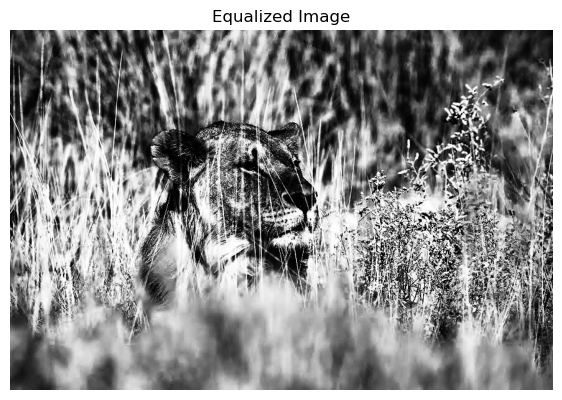

In [81]:
L = C_m * np.max(gray_img)
L_r = np.round(L, 0)

eq_img = np.zeros((w, h), np.uint8)
for i in range(w):
    for j in range(h):
        '''
        This is just like the above done hist_f loop
        '''
        eq_img[i, j] = L_r[gray_img[i, j]]
        
plt.figure(figsize=(7, 7))
plt.imshow(eq_img, 'gray')
plt.axis("off")
plt.title('Equalized Image')

Text(0, 0.5, 'Frequency')

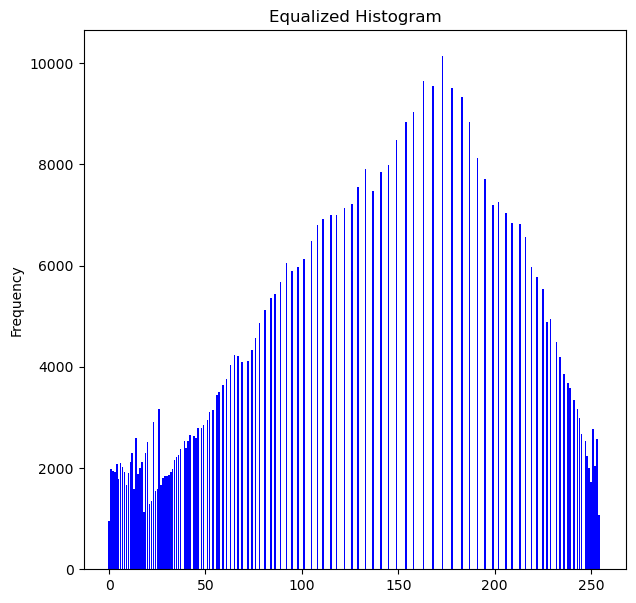

In [73]:
eq_hist = np.zeros(256)
for i in range(w):
    for j in range(h):
        eq_hist[(eq_img[i,j])] = eq_hist[(eq_img[i,j])] + 1
        
plt.figure(figsize=(7, 7))
plt.bar(list(range(len(eq_hist))), eq_hist, color='blue') 
plt.title('Equalized Histogram')
plt.ylabel('Frequency')

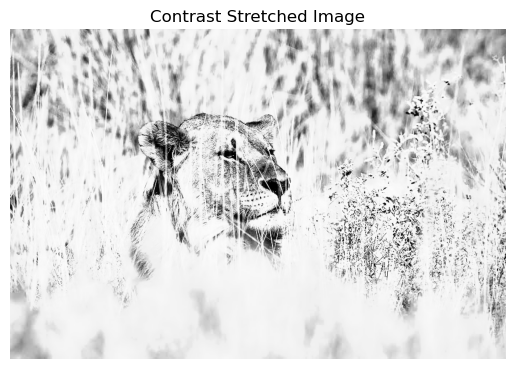

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img =  cv2.imread('Pic6.jpg')

# The values of xp and fp can be varied to create custom tables as required 
# and it will stretch the contrast even if min and max pixels are 0 and 255 

xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]

x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')

# cv2.LUT will replace the values of the original image with the values in the
# table. For example, all the pixels having values 1 will be replaced by 0 and 
# all pixels having values 4 will be replaced by 1.
img = cv2.LUT(img, table)

plt.imshow(img)
plt.axis("off")
plt.title('Contrast Stretched Image')

# from shujaat
def contrast_stretching(z, a, b, z1, zk):

    new_array = np.copy(z)
        
    for i,value in enumerate(z):
        if value>=a and value<=b:
            new_pixel_value = (((zk - z1)/(b-a))*value) + ((z1*b - zk*a)/(b-a))

            new_array[i] = new_pixel_value

    return new_array

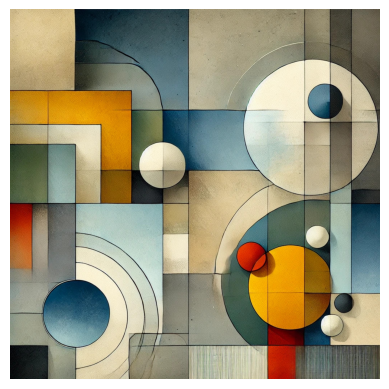

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'Pic1.jpg'
I = cv2.imread(image_path)
I_ = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I_)
plt.axis('off')
plt.show()




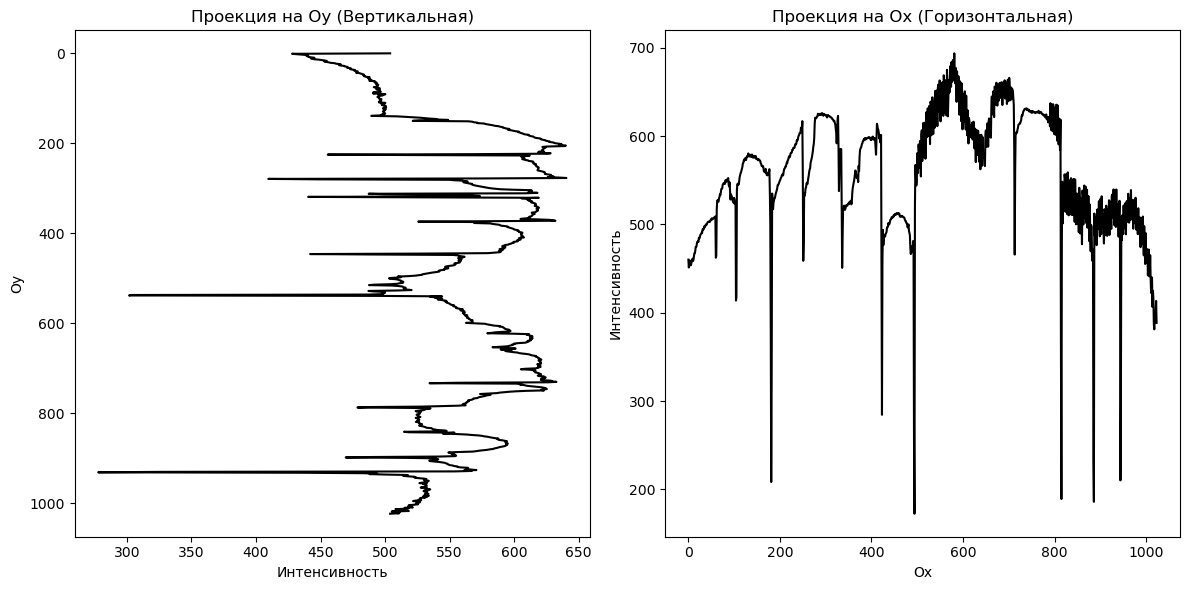

In [84]:
if I is None:
    print("Ошибка при загрузке изображения")
else:
    # Преобразуем изображение в градации серого (если изображение цветное)
    if I.ndim == 3:  # Проверка, если изображение имеет 3 канала (BGR)
        gray_image = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = I

    # Вычисление проекций на ось Oy (вертикальная проекция)
    proj_Oy = np.sum(gray_image, axis=1) / 255

    # Вычисление проекций на ось Ox (горизонтальная проекция)
    proj_Ox = np.sum(gray_image, axis=0) / 255

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Вертикальная проекция (Oy)
    ax1.plot(proj_Oy, range(len(proj_Oy)), color='black')
    ax1.set_title('Проекция на Oy (Вертикальная)')
    ax1.set_xlabel('Интенсивность')
    ax1.set_ylabel('Oy')
    ax1.invert_yaxis()  # Инвертируем ось Y для корректного отображения

    # Горизонтальная проекция (Ox)
    ax2.plot(range(len(proj_Ox)), proj_Ox, color='black')
    ax2.set_title('Проекция на Ox (Горизонтальная)')
    ax2.set_xlabel('Ox')
    ax2.set_ylabel('Интенсивность')

    plt.tight_layout()
    plt.show()

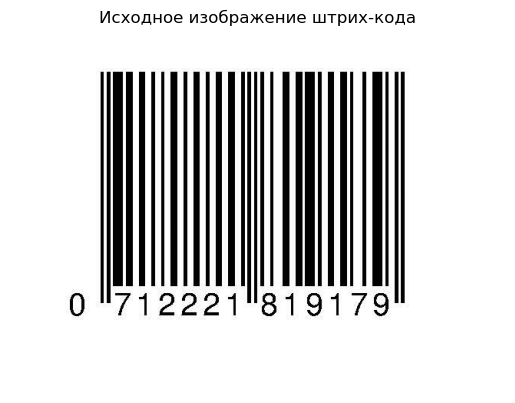

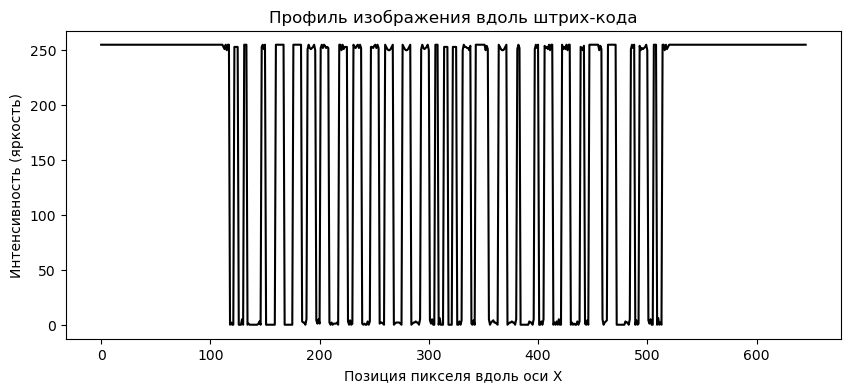

In [63]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Загрузка изображения штрих-кода
image_path = 'Pic3.jpg'  # Замените на путь к вашему изображению
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загрузим изображение в градациях серого

# Проверяем успешность загрузки
if I is None:
    print(f"Ошибка: изображение не удалось загрузить. Проверьте путь: {image_path}")
else:
    # Шаг 2: Определим строку изображения для построения профиля (например, центральная строка)
    row_number = I.shape[0] // 2  # Центральная строка
    profile = I[row_number, :]  # Профиль строки
    plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
    plt.title('Исходное изображение штрих-кода')
    plt.axis('off')
    plt.show()

    # Шаг 3: Построение профиля штрих-кода
    plt.figure(figsize=(10, 4))
    plt.plot(profile, color='black')  # Отобразим профиль
    plt.title('Профиль изображения вдоль штрих-кода')
    plt.xlabel('Позиция пикселя вдоль оси X')
    plt.ylabel('Интенсивность (яркость)')
    plt.show()
